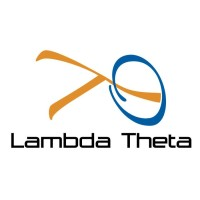

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv(r"dataset_five.csv")

In [18]:
df["Product"]

0     Cold Drinks
1     Cold Drinks
2     Cold Drinks
3     Cold Drinks
4     Cold Drinks
5     Cold Drinks
6     Cold Drinks
7     Cold Drinks
8     Cold Drinks
9     Cold Drinks
10          Sugar
11          Sugar
12          Sugar
13          Sugar
14          Sugar
15          Sugar
16          Sugar
17          Sugar
18          Sugar
19          Sugar
20     Medicines 
21     Medicines 
22     Medicines 
23     Medicines 
24     Medicines 
25     Medicines 
26     Medicines 
27     Medicines 
28     Medicines 
29     Medicines 
30           Milk
31           Milk
32           Milk
33           Milk
34           Milk
35           Milk
36           Milk
37           Milk
38           Milk
39           Milk
40        candies
41        candies
42        candies
43        candies
44        candies
45        candies
46        candies
47        candies
48        candies
49        candies
Name: Product, dtype: object

In [19]:
df = pd.get_dummies(df, columns=['Product'], drop_first=False)

In [20]:
y = df['Output']
X = df.drop('Output', axis=1)

In [21]:
X.columns

Index(['Season', 'Location', 'Competetion_in_Market', 'Marketing',
       'Consumer_Bahviour', 'Discounted_price', 'Product_Quality',
       'Product_Availability', 'Probabilty_of_sale', 'Recession',
       'Self_location', 'No_of_shelf', 'Essential_product',
       'Product_Cold Drinks', 'Product_Medicines ', 'Product_Milk',
       'Product_Sugar', 'Product_candies'],
      dtype='object')

In [22]:
X.head

<bound method NDFrame.head of     Season  Location  Competetion_in_Market  Marketing  Consumer_Bahviour  \
0        1       1.0                      1          1                  0   
1        0       0.5                      1          1                  0   
2        1       0.0                      1          1                  0   
3        1       1.0                      1          1                  0   
4        1       1.0                      1          1                  1   
5        1       1.0                      1          1                  1   
6        0       0.5                      0          1                  1   
7        1       1.0                      1          0                  1   
8        0       0.5                      1          1                  1   
9        1       0.0                      1          1                  0   
10       1       0.0                      1          1                  1   
11       1       0.0                      1   

In [41]:
model_ = sm.OLS(y, X).fit()

print(model_.summary())


                            OLS Regression Results                            
Dep. Variable:                 Output   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.616e+17
Date:                Sun, 12 Feb 2023   Prob (F-statistic):          1.25e-271
Time:                        15:42:53   Log-Likelihood:                 1034.9
No. Observations:                  50   AIC:                            -2034.
Df Residuals:                      32   BIC:                            -1999.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Season                    0.07

# Model ouput summary

The OLS (Ordinary Least Squares) Regression Results are a summary of a statistical model. The model is used to estimate the relationship between the dependent variable (Output) and several independent variables (Season, Location, Competetion_in_Market, Marketing, Consumer_Bahviour, Discounted_price, Product_Quality, Product_Availability, Probabilty_of_sale, Recession, Self_location, No_of_shelf, Essential_product, Product_Medicines, Product_Milk, Product_Sugar, Product_candies).

The R-squared (uncentered) value is 1.000, which indicates that the independent variables in the model explain 100% of the variation in the dependent variable. The adjusted R-squared is also 1.000, which means that all the independent variables are significant predictors of the dependent variable.

The F-statistic value of 1.164e+19 and a probability of 7.58e-305 indicate that the overall model is statistically significant. This means that at least one of the independent variables is related to the dependent variable.

The log-likelihood value of 1034.9, the AIC (Akaike Information Criterion) value of -2036, and the BIC (Bayesian Information Criterion) value of -2003 are measures of goodness of fit of the model. A lower AIC and BIC value indicates a better fit of the model.

The coef column shows the estimated coefficients of the independent variables in the model. The std err column shows the standard error of the coefficients. The t-value column shows the t-statistic of each coefficient, which is a measure of the significance of each coefficient. The p>|t| column shows the p-value of each coefficient, which indicates the level of significance. The [0.025, 0.975] column gives the 95% confidence interval for each coefficient, which shows the range of values that the true coefficient is likely to fall in.

The Omnibus value of 3.270 and a probability of 0.195 indicate that the residuals are not normally distributed. The Jarque-Bera (JB) value of 1.832 and a probability of 0.400 indicate that the residuals have a normal distribution. The Skew and Kurtosis values of 0.188 and 2.141, respectively, give additional information about the shape of the distribution of the residuals. The Cond. No. (Condition Number) of 27.0 gives an indication of the multicollinearity in the model, with higher values indicating higher levels of multicollinearity.

# Testing with different input features

model output for milk product


In [42]:

input_2=[1,  0, 1, 0, 0,  0.2, 1, 1 , 1, 1, 0 ,0, 1, 0, 1 ,0,  0 ,0]
outputs = model_.predict(input_2)
print(outputs)


[0.55384615]


model output for candy product

In [43]:
input_3=[0,0.5,0,0,0,0.4,0,1,0,1,0.2,0,0.5,0, 0, 0,  1,0 ]
outputs = model_.predict(input_3)
print(outputs)

[0.27692308]


# OCR TOOL

In [44]:
pip install ortools

Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
from ortools.sat.python import cp_model
import random

In [46]:
df = pd.read_csv("dataset_five_output.csv")
model = cp_model.CpModel()    
product_costs = list(df["Product_cost"])
unit_cost = list(df["Unit_cost"])
customer_budgets = []
for i in range(20):
    customer_budgets.append(100)
product_probs = list(df["Product_prob"])
#     print("product_probs")
for i, p in enumerate(product_probs):
    print(f"product {i}: {p}")
customer_probs = [0.46, 0.03, 0.87, 0.21, 0.36, 0.25, 0.27, 0.66, 0.15, 0.01, 0.19, 0.44, 0.54, 0.06,
                  0.49, 0.46, 0.86, 0.74, 0.19, 0.13]
#     print(customer_probs)
#     print("customer_probs")
for i, c in enumerate(customer_probs):
    pass
#         print(f"customer {i}: {c}")

customer_product = {}
for c in range(20):
    for p in range(len(product_costs)):
        customer_product[(c, p)] = model.NewBoolVar('customer_%i_buys_product_%i' % (c, p))
product_ads = {}
for p in range(len(product_costs)):
    product_ads[p] = model.NewBoolVar('product_%i_has_ads' % p)
for c in range(20):
    for p in range(len(product_costs)):
        model.Add(customer_product[(c, p)] <= int(customer_probs[c] < product_probs[p])).OnlyEnforceIf(product_ads[p].Not())
        model.Add(customer_product[(c, p)] <= int(customer_probs[c] < product_probs[p] + 0.2))

model.Add(sum(product_ads[p] for p in range(len(product_costs))) <= 5)

total_cost = sum(customer_product[(c, p)] * product_costs[p] for c in range(20) for p in range(len(product_costs)))

total_profit = sum(customer_product[(c, p)] * (product_costs[p] - unit_cost[p]) for c in range(20) for p in range(len(product_costs)))

for c in range(20):
    model.Add(sum(customer_product[(c, p)] * product_costs[p] for p in range(len(product_costs))) <= customer_budgets[c])


model.Maximize(total_profit)

# Solve the model.
solver = cp_model.CpSolver()
solver.parameters.num_search_workers = 8
solver.parameters.max_time_in_seconds = 10
solver.parameters.log_search_progress = True
solver.Solve(model)

# Print the solution.
#     print('Total Sales:', solver.ObjectiveValue())
for c in range(20):
    for p in range(len(product_costs)):
        # customer who bought product
        if solver.Value(customer_product[(c, p)]) == 1:
            # products having ads
            if solver.Value(product_ads[p]) == 1:
                if product_probs[p] + 0.2 > 1.00:
                    print('Customer: %i buys product: %i at cost: %i with customer prob: %.2f and product prob: %.2f' %
                          (c, p, product_costs[p], customer_probs[c], 1.00))
                else:
                    print(
                        'Customer: %i buys product: %i at cost: %i with customer prob: %.2f and product prob: %.2f' %
                        (c, p, product_costs[p], customer_probs[c], product_probs[p]+0.2))
            else:
                print('Customer: %i buys product: %i at cost: %i with customer prob: %.2f and product prob: %.2f' %
                      (c, p, product_costs[p], customer_probs[c], product_probs[p]))
print('Ads assigned to Products:', end=' ')
ads = [0 for _ in range(len(product_costs))]
for p in range(len(product_costs)):
    if solver.Value(product_ads[p]) == 1:
        ads[p] = 1
        print(p, end=' ')
print()
for p in range(len(product_costs)):
    print(product_probs[p], end=' ')
print()

for p in range(len(product_costs)):
    if solver.Value(product_ads[p]) == 1:
        if product_probs[p] + 0.2 > 1.00:
            product_probs[p] = 1.00
        else:
            product_probs[p] += 0.2
    print(round(product_probs[p], 2), end=' ')
print()
print(product_probs)
print(ads)
df["Product_prob"] = product_probs
df["Marketing"] = ads
for i in range(len(product_costs)):
    print(list(df.loc[i]))
df.to_csv("dataset_five_output.csv", index= False)


product 0: 1.0
product 1: 0.62
product 2: 0.8800000000000001
product 3: 0.95
product 4: 0.33
Customer: 0 buys product: 0 at cost: 10 with customer prob: 0.46 and product prob: 1.00
Customer: 0 buys product: 1 at cost: 15 with customer prob: 0.46 and product prob: 0.82
Customer: 0 buys product: 2 at cost: 20 with customer prob: 0.46 and product prob: 0.88
Customer: 0 buys product: 3 at cost: 25 with customer prob: 0.46 and product prob: 0.95
Customer: 0 buys product: 4 at cost: 30 with customer prob: 0.46 and product prob: 0.53
Customer: 1 buys product: 0 at cost: 10 with customer prob: 0.03 and product prob: 1.00
Customer: 1 buys product: 1 at cost: 15 with customer prob: 0.03 and product prob: 0.82
Customer: 1 buys product: 2 at cost: 20 with customer prob: 0.03 and product prob: 0.88
Customer: 1 buys product: 3 at cost: 25 with customer prob: 0.03 and product prob: 0.95
Customer: 1 buys product: 4 at cost: 30 with customer prob: 0.03 and product prob: 0.53
Customer: 2 buys product: 0

In [47]:
dat=[]
for i in range(len(product_costs)):
#     print(list(df.loc[i])
    dat.append(df.loc[i])

In [48]:
dat[1]

Product                  Sugar
Season                       1
Location                   0.0
Competetion_in_Market        1
Marketing                    1
Consumer_Bahviour            1
Discounted_price           0.5
Product_Quality              1
Product_Availability         1
Probabilty_of_sale           1
Recession                    1
Self_location              1.0
No_of_shelf                0.1
Unit_cost                   10
Product_cost                15
Product_prob              0.82
Essential_product          0.5
Name: 1, dtype: object

# testing

In [49]:
X.columns

Index(['Season', 'Location', 'Competetion_in_Market', 'Marketing',
       'Consumer_Bahviour', 'Discounted_price', 'Product_Quality',
       'Product_Availability', 'Probabilty_of_sale', 'Recession',
       'Self_location', 'No_of_shelf', 'Essential_product',
       'Product_Cold Drinks', 'Product_Medicines ', 'Product_Milk',
       'Product_Sugar', 'Product_candies'],
      dtype='object')

In [50]:
print(len(X.columns))

18


1. prediction for colddrink

In [52]:
input_4=[1,1,1,1,0,0.5,1,1,1,1,1,0.3,1,1,0,0,0,0]
outputs = model_.predict(input_4)
print(outputs)

[0.83076923]


2. prediction for milk priduct

In [53]:
input_5=[1,1,1,1,1,0.4,1,1,1,1,1,0.4,1,0,0,1,0,0]
outputs = model_.predict(input_5)
print(outputs)

[0.90769231]
